In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#import sweeps:

short_8_sweep = np.fliplr(np.loadtxt('../../../Sweep-Txt-Files/matrix_8_short_n_0.2-1.2_sr_0-1.txt'))
short_4_sweep = np.fliplr(np.loadtxt('../../../Sweep-Txt-Files/Nick_PTE4_Short_2DSweep.txt'))
tall_4_sweep = np.fliplr(np.loadtxt('../../../Sweep-Txt-Files/matrix_4_tall_n_0.2-1.2_sr_0-1.txt'))

In [29]:
dspecular_ratio_values = np.linspace(0,1,256)
n_values = np.linspace(0.2,1.2,256)

In [30]:
def plot_heatmap(array, color_scheme, colorbar_label, title, ax, vmin = None, vmax = None):
    if ax is None:
            fig, ax = plt.subplots(figsize=(6, 6))  # Create a new figure and axis if ax is None
    cax = ax.imshow(array, cmap=color_scheme)

    if vmin and vmax:
        cax = ax.imshow(array, cmap=color_scheme, vmin = vmin, vmax = vmax)
    

    x_positions = np.linspace(0, 256, 6)
    x_labels = np.linspace(0.2, 1.2, 6)

    ax.set_xticks(x_positions)
    ax.set_xticklabels([f"{x:.1f}" for x in x_labels])

    y_positions = np.linspace(0, 256, 6)
    y_labels = np.linspace(1, 0, 6)

    ax.set_yticks(y_positions)
    ax.set_yticklabels([f"{y:.1f}" for y in y_labels])

    cbar = plt.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label(colorbar_label)
    
    ax.set_title(title)
    ax.set_xlabel('Real Part of Refractive Index (n)')
    ax.set_ylabel('Specular Ratio')

def create_side_by_side_plots(array1, array2, color_scheme, colorbar_label, title1, title2, same_bar = True):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
    vmin = vmax = None
    if same_bar:
        vmin = min(array1.min(), array2.min())
        vmax = max(array1.max(), array2.max())

    plot_heatmap(array1, color_scheme, colorbar_label, title1, ax1, vmin = vmin, vmax = vmax)
    plot_heatmap(array2, color_scheme, colorbar_label, title2, ax2, vmin = vmin, vmax = vmax)

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()
      

In [31]:
def plot_correlation(array1, array2, arr1_label, arr2_label):
    # Flatten the 2D arrays to 1D
    flattened_array1 = array1.flatten()
    flattened_array2 = array2.flatten()

    # Compute the Pearson correlation coefficient
    correlation_matrix = np.corrcoef(flattened_array1, flattened_array2)

    # Create the correlation heatmap
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.heatmap(correlation_matrix, annot=True, fmt=".4f", cmap='coolwarm', 
                cbar_kws={"shrink": 0.8}, ax=ax, annot_kws={"size": 12})
    title="Correlation Heatmap between " + arr1_label + " and " + arr2_label
    ax.set_title(title)
    ax.set_xticklabels([arr1_label, arr2_label], rotation=45)
    ax.set_yticklabels([arr1_label, arr2_label], rotation=45)

    plt.tight_layout()
    plt.show()

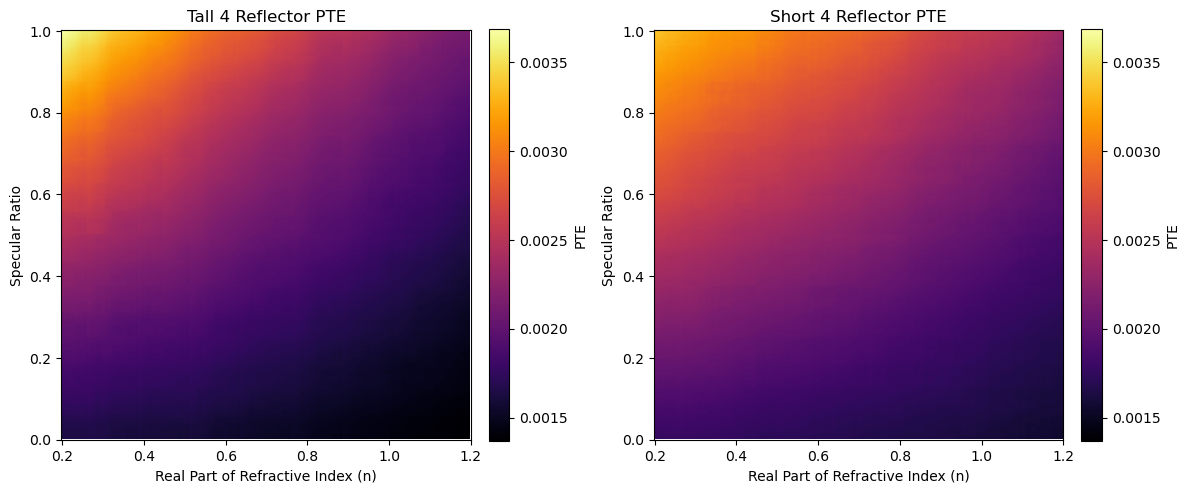

0.003689
0.003362


In [32]:
create_side_by_side_plots(tall_4_sweep, short_4_sweep, 'inferno', 'PTE', 'Tall 4 Reflector PTE', 'Short 4 Reflector PTE')
print(np.max(tall_4_sweep))
print(np.max(short_4_sweep))

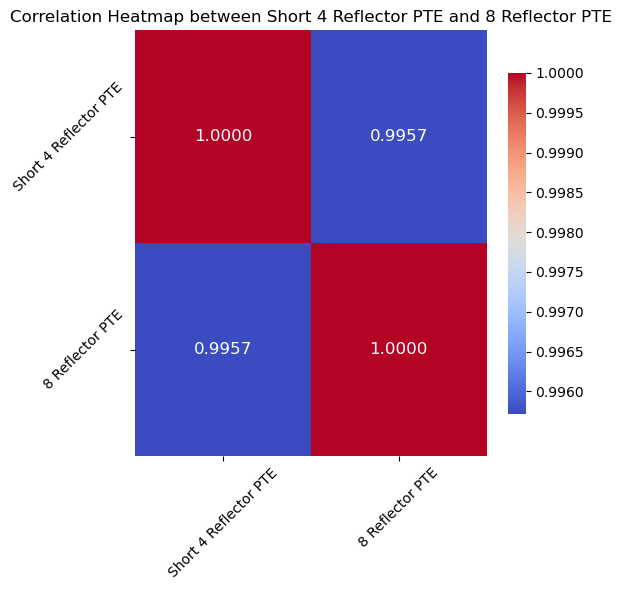

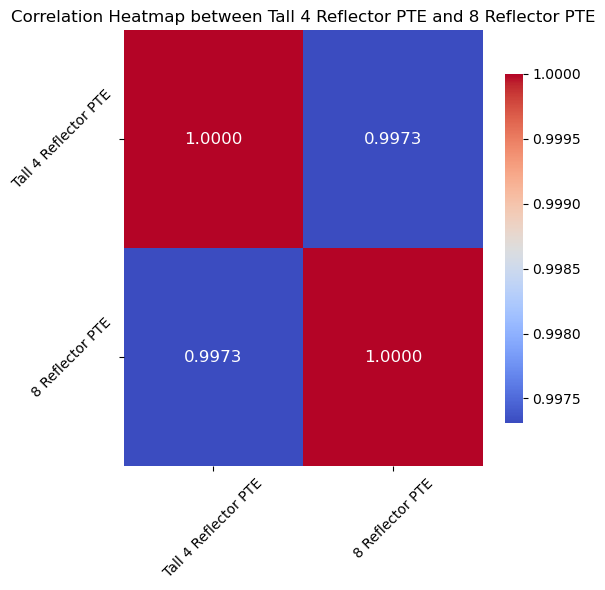

In [33]:
plot_correlation(short_4_sweep, short_8_sweep, 'Short 4 Reflector PTE', '8 Reflector PTE')
plot_correlation(tall_4_sweep, short_8_sweep, 'Tall 4 Reflector PTE', '8 Reflector PTE')

In [34]:
pte_short_no_reflector = 0.0013598
pte_tall_no_reflector = 0.001268

short_4_ratio = short_4_sweep/pte_short_no_reflector
short_8_ratio = short_8_sweep/pte_short_no_reflector
tall_4_ratio = tall_4_sweep/pte_tall_no_reflector

short_8_subtracted_ratio = short_8_ratio - short_4_ratio
short_4_subtracted_ratio = short_4_ratio - 1
tall_4_subtracted_ratio = tall_4_ratio - 1

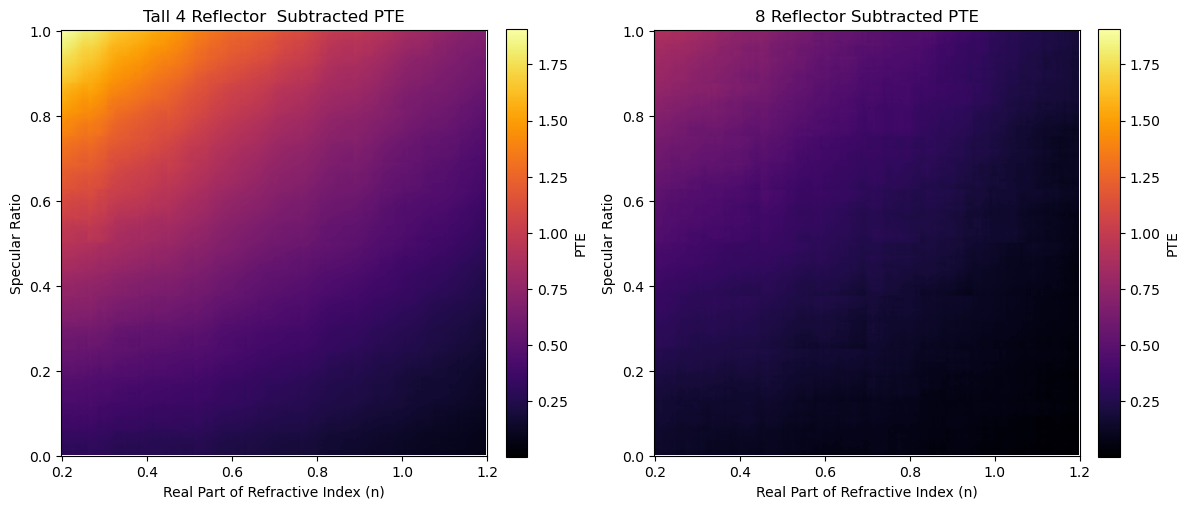

In [35]:
create_side_by_side_plots(tall_4_subtracted_ratio, short_8_subtracted_ratio, 'inferno', 'PTE', 'Tall 4 Reflector  Subtracted PTE', '8 Reflector Subtracted PTE')

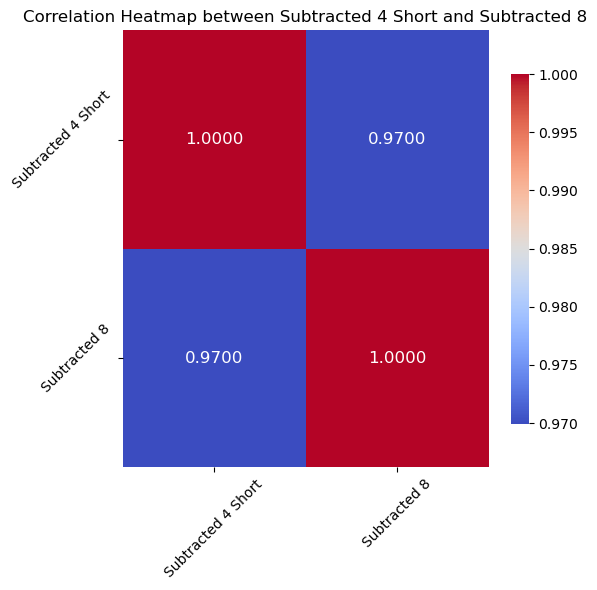

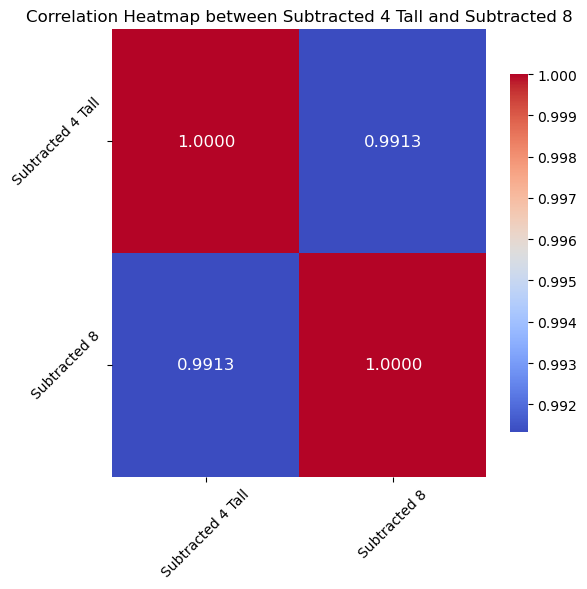

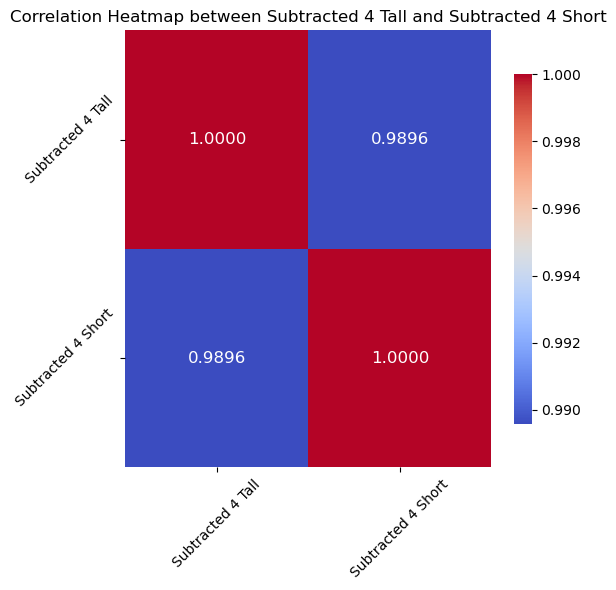

In [36]:
plot_correlation(short_4_subtracted_ratio, short_8_subtracted_ratio, 'Subtracted 4 Short', 'Subtracted 8')
plot_correlation(tall_4_subtracted_ratio, short_8_subtracted_ratio, 'Subtracted 4 Tall', 'Subtracted 8')
plot_correlation(tall_4_subtracted_ratio, short_4_subtracted_ratio, 'Subtracted 4 Tall', 'Subtracted 4 Short')

In [37]:
def apply_score_function(pte_arr, alpha_ratio):
    return -np.abs(pte_arr - alpha_ratio)**(0.5)

In [38]:
alpha_4_tall = 1.8
alpha_4_short = alpha_4_tall * 1.072
alpha_8 = 2.46
alpha_4_short_subtracted = alpha_4_short - 1
alpha_8_subtracted = alpha_8 - alpha_4_short
alpha_4_tall_subtracted = alpha_4_tall - 1


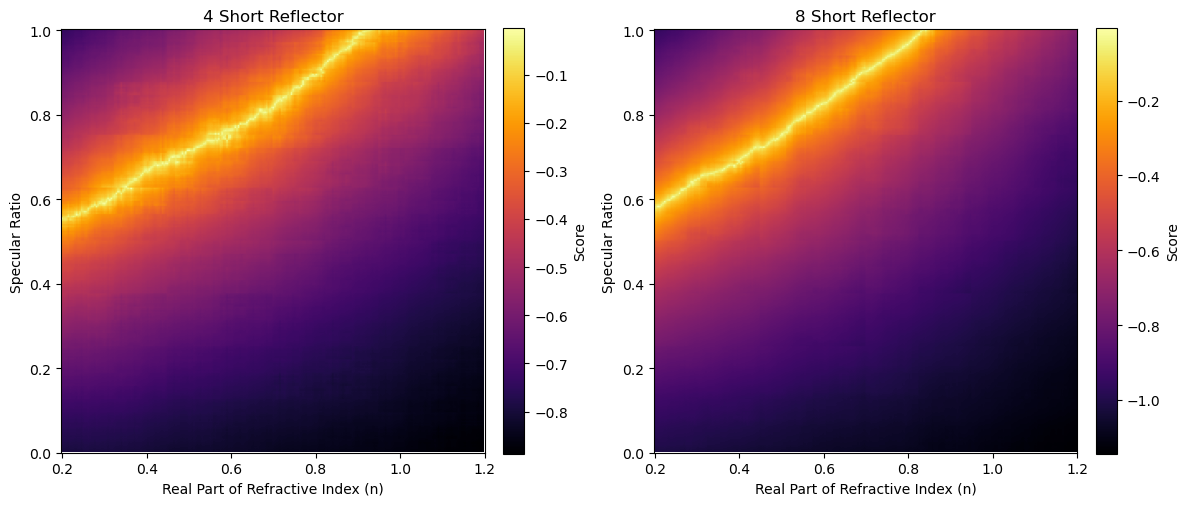

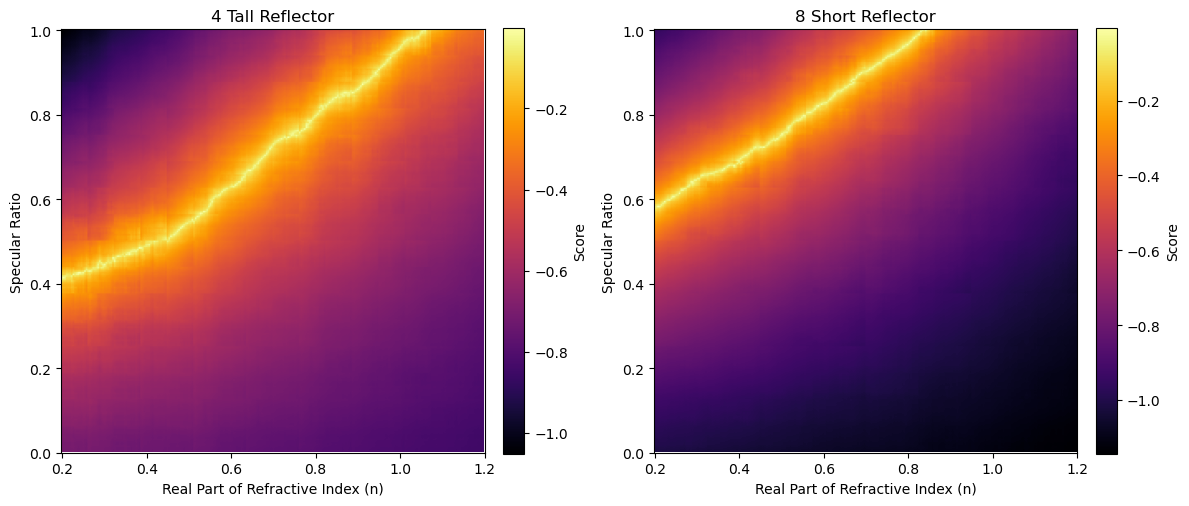

In [39]:
scored_4_short = apply_score_function(short_4_ratio, alpha_4_short)
scored_4_tall = apply_score_function(tall_4_ratio, alpha_4_tall)
scored_8 = apply_score_function(short_8_ratio, alpha_8)

create_side_by_side_plots(scored_4_short, scored_8, 'inferno', 'Score', '4 Short Reflector', '8 Short Reflector', same_bar = False)
create_side_by_side_plots(scored_4_tall, scored_8, 'inferno', 'Score', '4 Tall Reflector', '8 Short Reflector', same_bar = False)

TypeError: cannot unpack non-iterable NoneType object

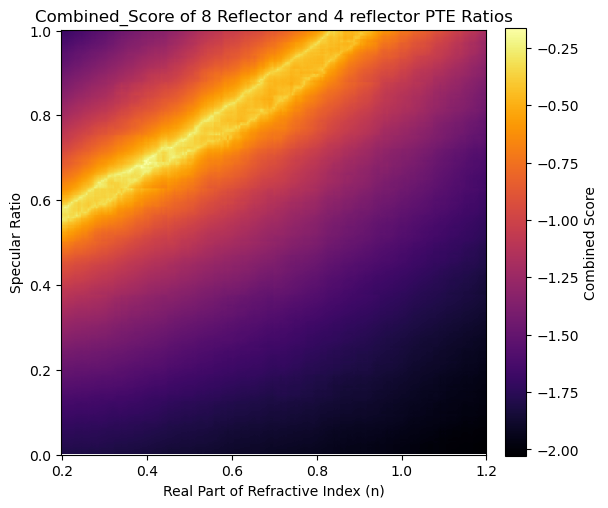

In [40]:
overlaid_score_short = scored_8 + scored_4_short
fig, ax = plot_heatmap(overlaid_score_short, 'inferno', 'Combined Score', 'Combined_Score of 8 Reflector and 4 reflector PTE Ratios', ax = None, vmin = None, vmax = None)
plt.show()

overlaid_score_tall = scored_8 + scored_4_tall
fig, ax = plot_heatmap(overlaid_score_tall, 'inferno', 'Combined Score', 'Combined_Score of 8 Reflector and 4 reflector  tall PTE Ratios', ax = None, vmin = None, vmax = None)
plt.show()

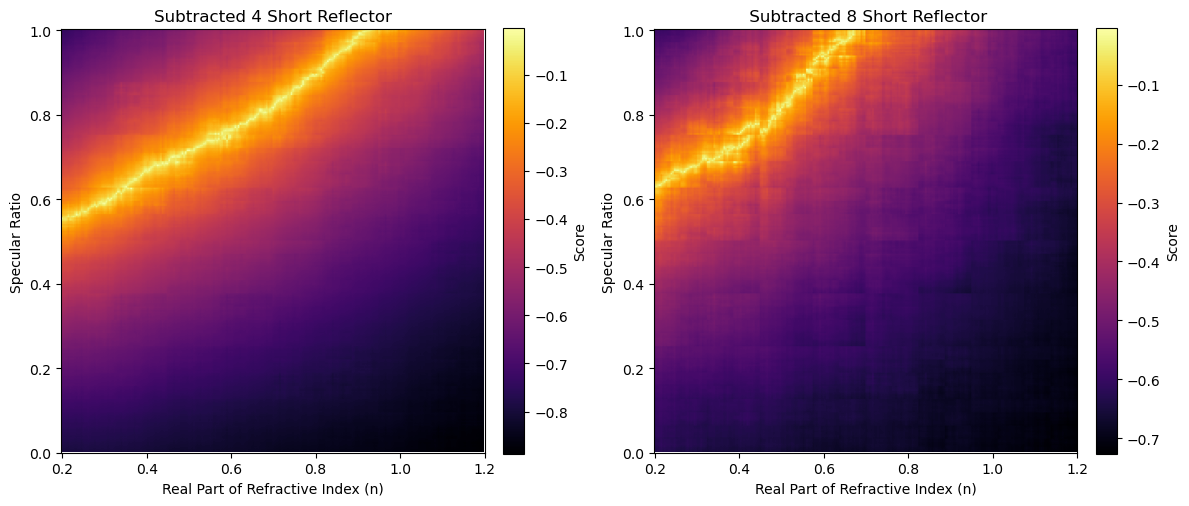

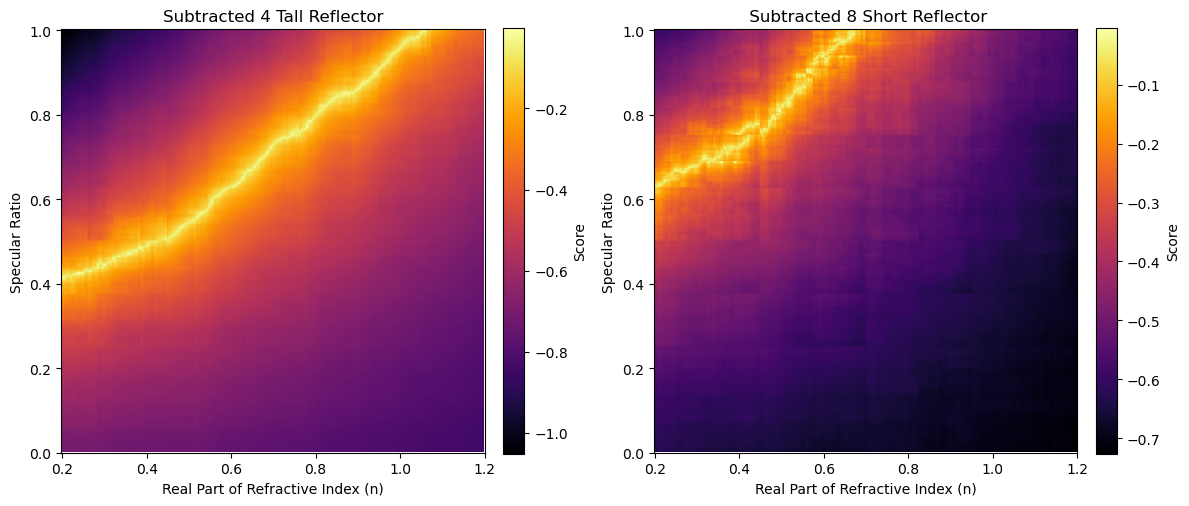

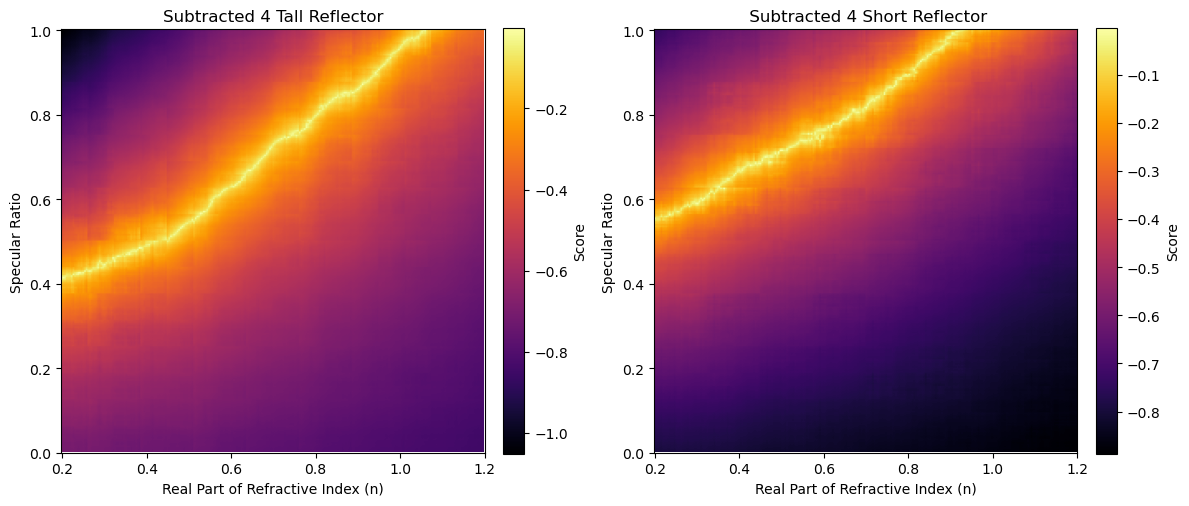

In [42]:
scored_4_subtracted_short = apply_score_function(short_4_subtracted_ratio, alpha_4_short_subtracted)
scored_4_subtracted_tall = apply_score_function(tall_4_subtracted_ratio, alpha_4_tall_subtracted)
scored_8_subtracted = apply_score_function(short_8_subtracted_ratio, alpha_8_subtracted)

create_side_by_side_plots(scored_4_subtracted_short, scored_8_subtracted, 'inferno', 'Score', 'Subtracted 4 Short Reflector', ' Subtracted 8 Short Reflector', same_bar = False)
create_side_by_side_plots(scored_4_subtracted_tall, scored_8_subtracted, 'inferno', 'Score', 'Subtracted 4 Tall Reflector', ' Subtracted 8 Short Reflector', same_bar = False)
create_side_by_side_plots(scored_4_subtracted_tall, scored_4_subtracted_short, 'inferno', 'Score', 'Subtracted 4 Tall Reflector', ' Subtracted 4 Short Reflector', same_bar = False)

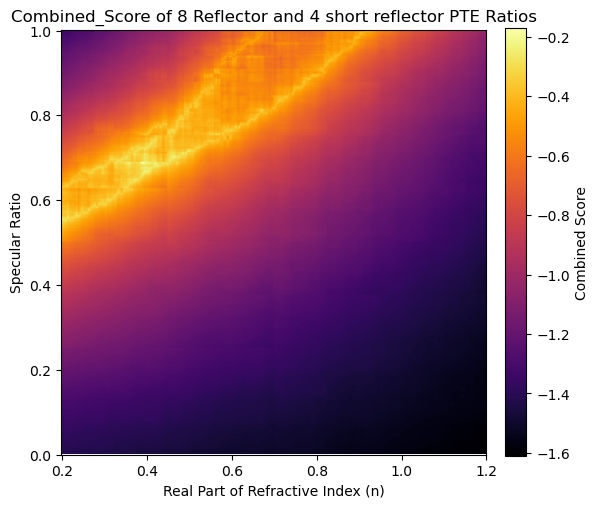

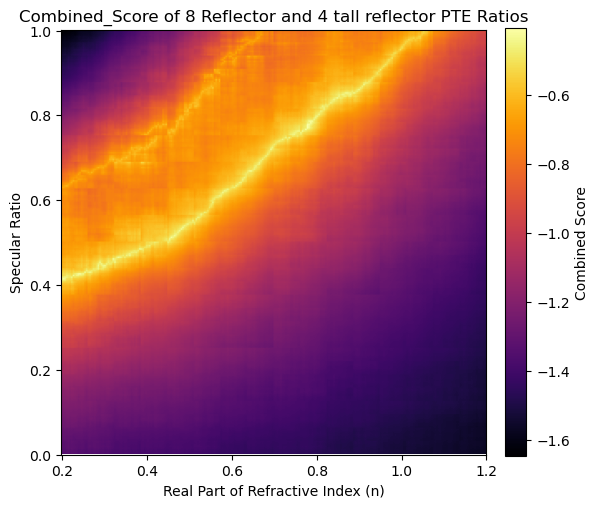

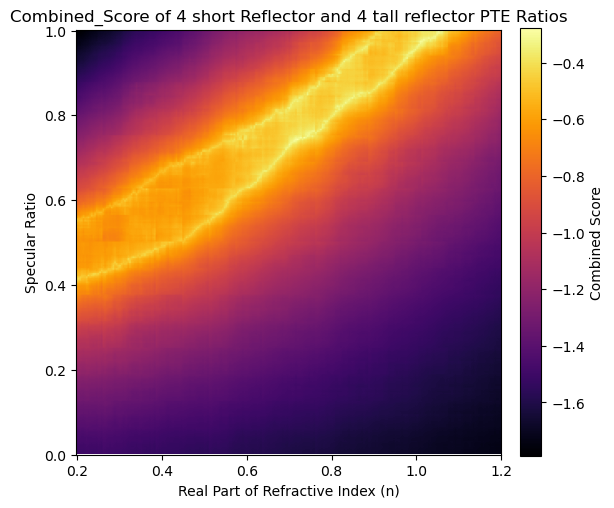

In [44]:
overlaid_score_sub = scored_8_subtracted + scored_4_subtracted_short
plot_heatmap(overlaid_score_sub, 'inferno', 'Combined Score', 'Combined_Score of 8 Reflector and 4 short reflector PTE Ratios', ax = None, vmin = None, vmax = None)
plt.show()

overlaid_score_sub = scored_8_subtracted + scored_4_subtracted_tall
plot_heatmap(overlaid_score_sub, 'inferno', 'Combined Score', 'Combined_Score of 8 Reflector and 4 tall reflector PTE Ratios', ax = None, vmin = None, vmax = None)
plt.show()

overlaid_score_sub = scored_4_subtracted_tall + scored_4_subtracted_short
plot_heatmap(overlaid_score_sub, 'inferno', 'Combined Score', 'Combined_Score of 4 short Reflector and 4 tall reflector PTE Ratios', ax = None, vmin = None, vmax = None)
plt.show()